In [21]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sta
from shapely import wkt

gdf = gpd.read_file('NFDB_point_20220901.shp')
gdf.head(5)

,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,ATTK_DATE,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,geometry
0,BC,1953-G00041,None,59.963,-128.172,1953,5,26,1953-05-26,None,...,BC-1953-1953-G00041,None,None,2020-05-05,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT Z (-1720729.937 1659437.590 0.000)
1,BC,1950-R00028,None,59.318,-132.172,1950,6,22,1950-06-22,None,...,BC-1950-1950-R00028,None,None,2020-05-05,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT Z (-1944086.504 1715216.943 0.000)
2,BC,1950-G00026,None,59.876,-131.922,1950,6,4,1950-06-04,None,...,BC-1950-1950-G00026,None,None,2020-05-05,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT Z (-1899364.952 1758151.328 0.000)
3,BC,1951-R00097,None,59.760,-132.808,1951,7,15,1951-07-15,None,...,BC-1951-1951-R00097,None,None,2020-05-05,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT Z (-1946555.868 1774479.072 0.000)
4,BC,1952-G00116,None,59.434,-126.172,1952,6,12,1952-06-12,None,...,BC-1952-1952-G00116,None,None,2020-05-05,BC,12,12,Boreal Cordillera,CordillCre boreale,POINT Z (-1652703.809 1556259.590 0.000)


In [22]:
gdf.shape

(423831, 27)

In [23]:
#filtering the data
data = gdf[
    (gdf['SRC_AGENCY'].isin(['BC', 'ON', 'AB', 'QC'])) & 
    (gdf['YEAR'].between(2010, 2021))
]
data = data.copy()
data.head()


,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,ATTK_DATE,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,geometry
124910,BC,2010-G80160,None,57.3223,-121.7052,2010,6,20,2010-06-20,None,...,BC-2010-2010-G80160,None,None,2020-05-05,BC,4,4,Taiga Plain,Taiga des plaines,POINT Z (-1524667.873 1238667.816 0.000)
124911,BC,2010-G80208,None,57.1197,-122.6805,2010,7,8,2010-07-08,None,...,BC-2010-2010-G80208,None,None,2020-05-05,BC,4,4,Taiga Plain,Taiga des plaines,POINT Z (-1586145.452 1242469.522 0.000)
124912,BC,2010-G80238,None,57.4533,-121.5483,2010,7,10,2010-07-10,None,...,BC-2010-2010-G80238,None,None,2020-05-05,BC,4,4,Taiga Plain,Taiga des plaines,POINT Z (-1510467.910 1247934.119 0.000)
124942,BC,2010-G80128,None,58.2532,-120.7874,2010,6,2,2010-06-02,None,...,BC-2010-2010-G80128,None,None,2020-05-05,BC,4,4,Taiga Plain,Taiga des plaines,POINT Z (-1435348.905 1309936.562 0.000)
124943,BC,2010-G80129,None,58.2367,-120.5783,2010,6,1,2010-06-01,None,...,BC-2010-2010-G80129,None,None,2020-05-05,BC,4,4,Taiga Plain,Taiga des plaines,POINT Z (-1425050.451 1303585.103 0.000)


In [24]:
data.describe(include='all')

,SRC_AGENCY,FIRE_ID,FIRENAME,LATITUDE,LONGITUDE,YEAR,MONTH,DAY,REP_DATE,ATTK_DATE,...,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,ACQ_DATE,SRC_AGY2,ECOZONE,ECOZ_REF,ECOZ_NAME,ECOZ_NOM,geometry
count,49953,49953,2127,49953.000000,49953.000000,49953.000000,49953.000000,49953.000000,49952,911,...,49953,563,0,49953,49953,49953.000000,49953,49953,49953,49953
unique,4,29730,1433,NaN,NaN,NaN,NaN,NaN,3018,283,...,49779,2,0,20,4,NaN,14,14,12,49685
top,BC,KEN1,HWF007,NaN,NaN,NaN,NaN,NaN,2018-07-31,2021-06-07,...,AB-2010-CWF262,location not ignition - coords derived from poly,NaN,2020-05-05,BC,NaN,14,Montane Cordillera,Bouclier bordal,POINT Z (-1093324.9509926168 1207409.618024660...
freq,16831,18,2,NaN,NaN,NaN,NaN,NaN,241,19,...,2,561,NaN,14514,16831,NaN,14606,14606,15054,9
mean,NaN,NaN,NaN,51.794079,-106.114035,2015.235822,6.576642,15.459072,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.543671,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.616888,18.048652,3.490699,1.596303,8.972999,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.498458,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,42.914700,-134.941300,2010.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,49.355900,-119.398400,2012.000000,5.000000,8.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,51.196793,-115.102000,2015.000000,7.000000,15.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,54.650417,-90.229600,2018.000000,8.000000,23.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN


In [25]:
data_info = data.info()
data_info

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 49953 entries, 124910 to 371543
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SRC_AGENCY  49953 non-null  object  
 1   FIRE_ID     49953 non-null  object  
 2   FIRENAME    2127 non-null   object  
 3   LATITUDE    49953 non-null  float64 
 4   LONGITUDE   49953 non-null  float64 
 5   YEAR        49953 non-null  int64   
 6   MONTH       49953 non-null  int64   
 7   DAY         49953 non-null  int64   
 8   REP_DATE    49952 non-null  object  
 9   ATTK_DATE   911 non-null    object  
 10  OUT_DATE    29974 non-null  object  
 11  DECADE      49953 non-null  object  
 12  SIZE_HA     49953 non-null  float64 
 13  CAUSE       49953 non-null  object  
 14  PROTZONE    7859 non-null   object  
 15  FIRE_TYPE   32508 non-null  object  
 16  MORE_INFO   14108 non-null  object  
 17  CFS_REF_ID  49953 non-null  object  
 18  CFS_NOTE1   563 non-null    object  


In [26]:
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100
missing_values_percentage_sorted = missing_values_percentage.sort_values(ascending=False)
missing_values_percentage_sorted

CFS_NOTE2     100.000000
CFS_NOTE1      98.872941
ATTK_DATE      98.176286
FIRENAME       95.741997
PROTZONE       84.267211
MORE_INFO      71.757452
OUT_DATE       39.995596
FIRE_TYPE      34.922827
REP_DATE        0.002002
CFS_REF_ID      0.000000
SRC_AGY2        0.000000
ACQ_DATE        0.000000
ECOZONE         0.000000
ECOZ_REF        0.000000
ECOZ_NAME       0.000000
ECOZ_NOM        0.000000
SRC_AGENCY      0.000000
CAUSE           0.000000
FIRE_ID         0.000000
SIZE_HA         0.000000
DECADE          0.000000
DAY             0.000000
MONTH           0.000000
YEAR            0.000000
LONGITUDE       0.000000
LATITUDE        0.000000
geometry        0.000000
dtype: float64

In [27]:
fire_counts_by_province = data['SRC_AGENCY'].value_counts().head(10) 
fire_counts_by_province


SRC_AGENCY
BC    16831
AB    16322
ON    10549
QC     6251
Name: count, dtype: int64

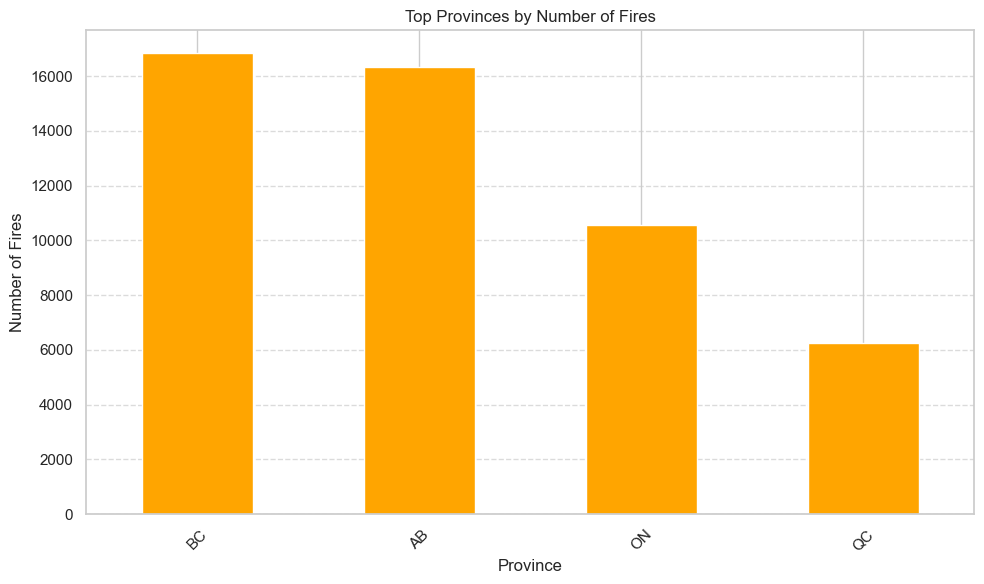

In [28]:
#top Provinces by Number of Fires
plt.figure(figsize=(10, 6))
fire_counts_by_province.plot(kind='bar', color='orange')
plt.title('Top Provinces by Number of Fires')
plt.xlabel('Province')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


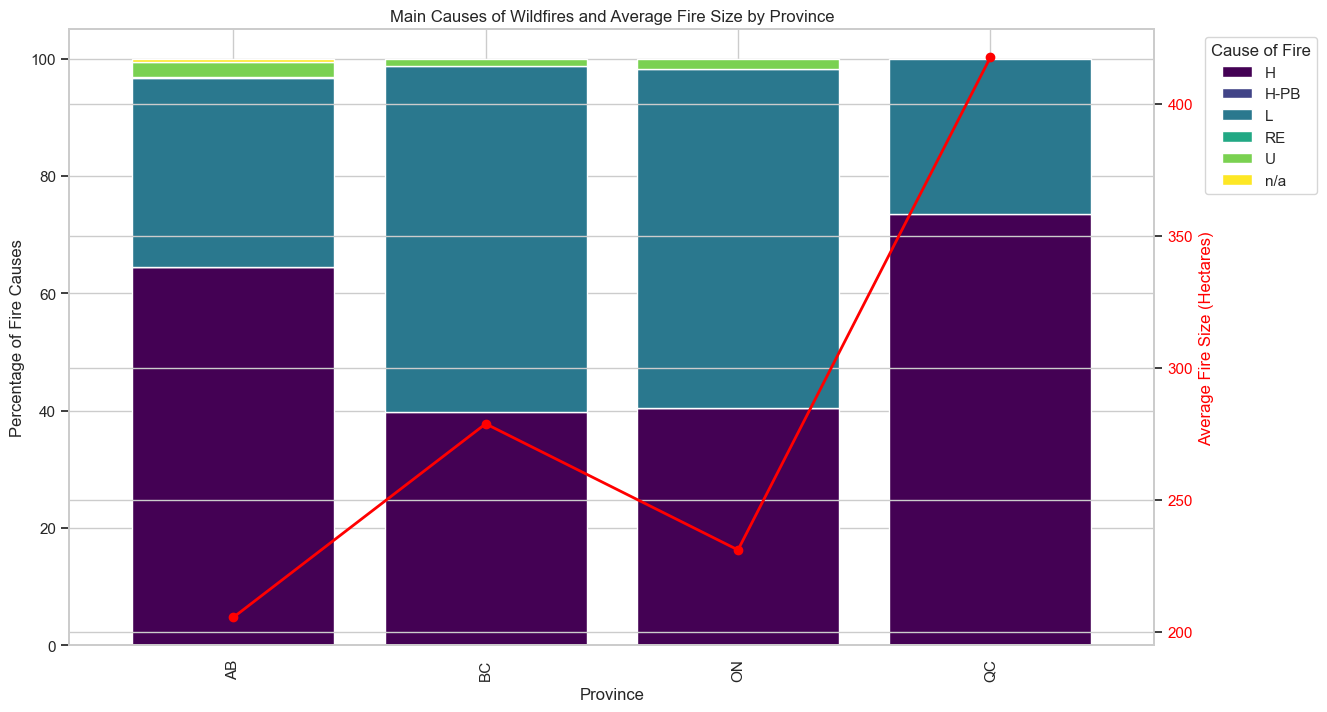

In [29]:
#main causes of wildfires and average Fire Size by Province
causes_by_province = data.groupby('SRC_AGENCY')['CAUSE'].value_counts(normalize=True).unstack().fillna(0) * 100
average_size_by_province = data.groupby('SRC_AGENCY')['SIZE_HA'].mean()

fig, ax1 = plt.subplots(figsize=(14, 8))

causes_by_province.plot(kind='bar', ax=ax1, width=0.8, stacked=True, colormap='viridis')
ax1.set_title('Main Causes of Wildfires and Average Fire Size by Province')
ax1.set_ylabel('Percentage of Fire Causes')
ax1.set_xlabel('Province')
ax1.legend(title='Cause of Fire', bbox_to_anchor=(1.04,1), loc="upper left")

ax2 = ax1.twinx()
average_size_by_province.plot(kind='line', marker='o', ax=ax2, color='red', linewidth=2)
ax2.set_ylabel('Average Fire Size (Hectares)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
plt.show()


Temporal Trends

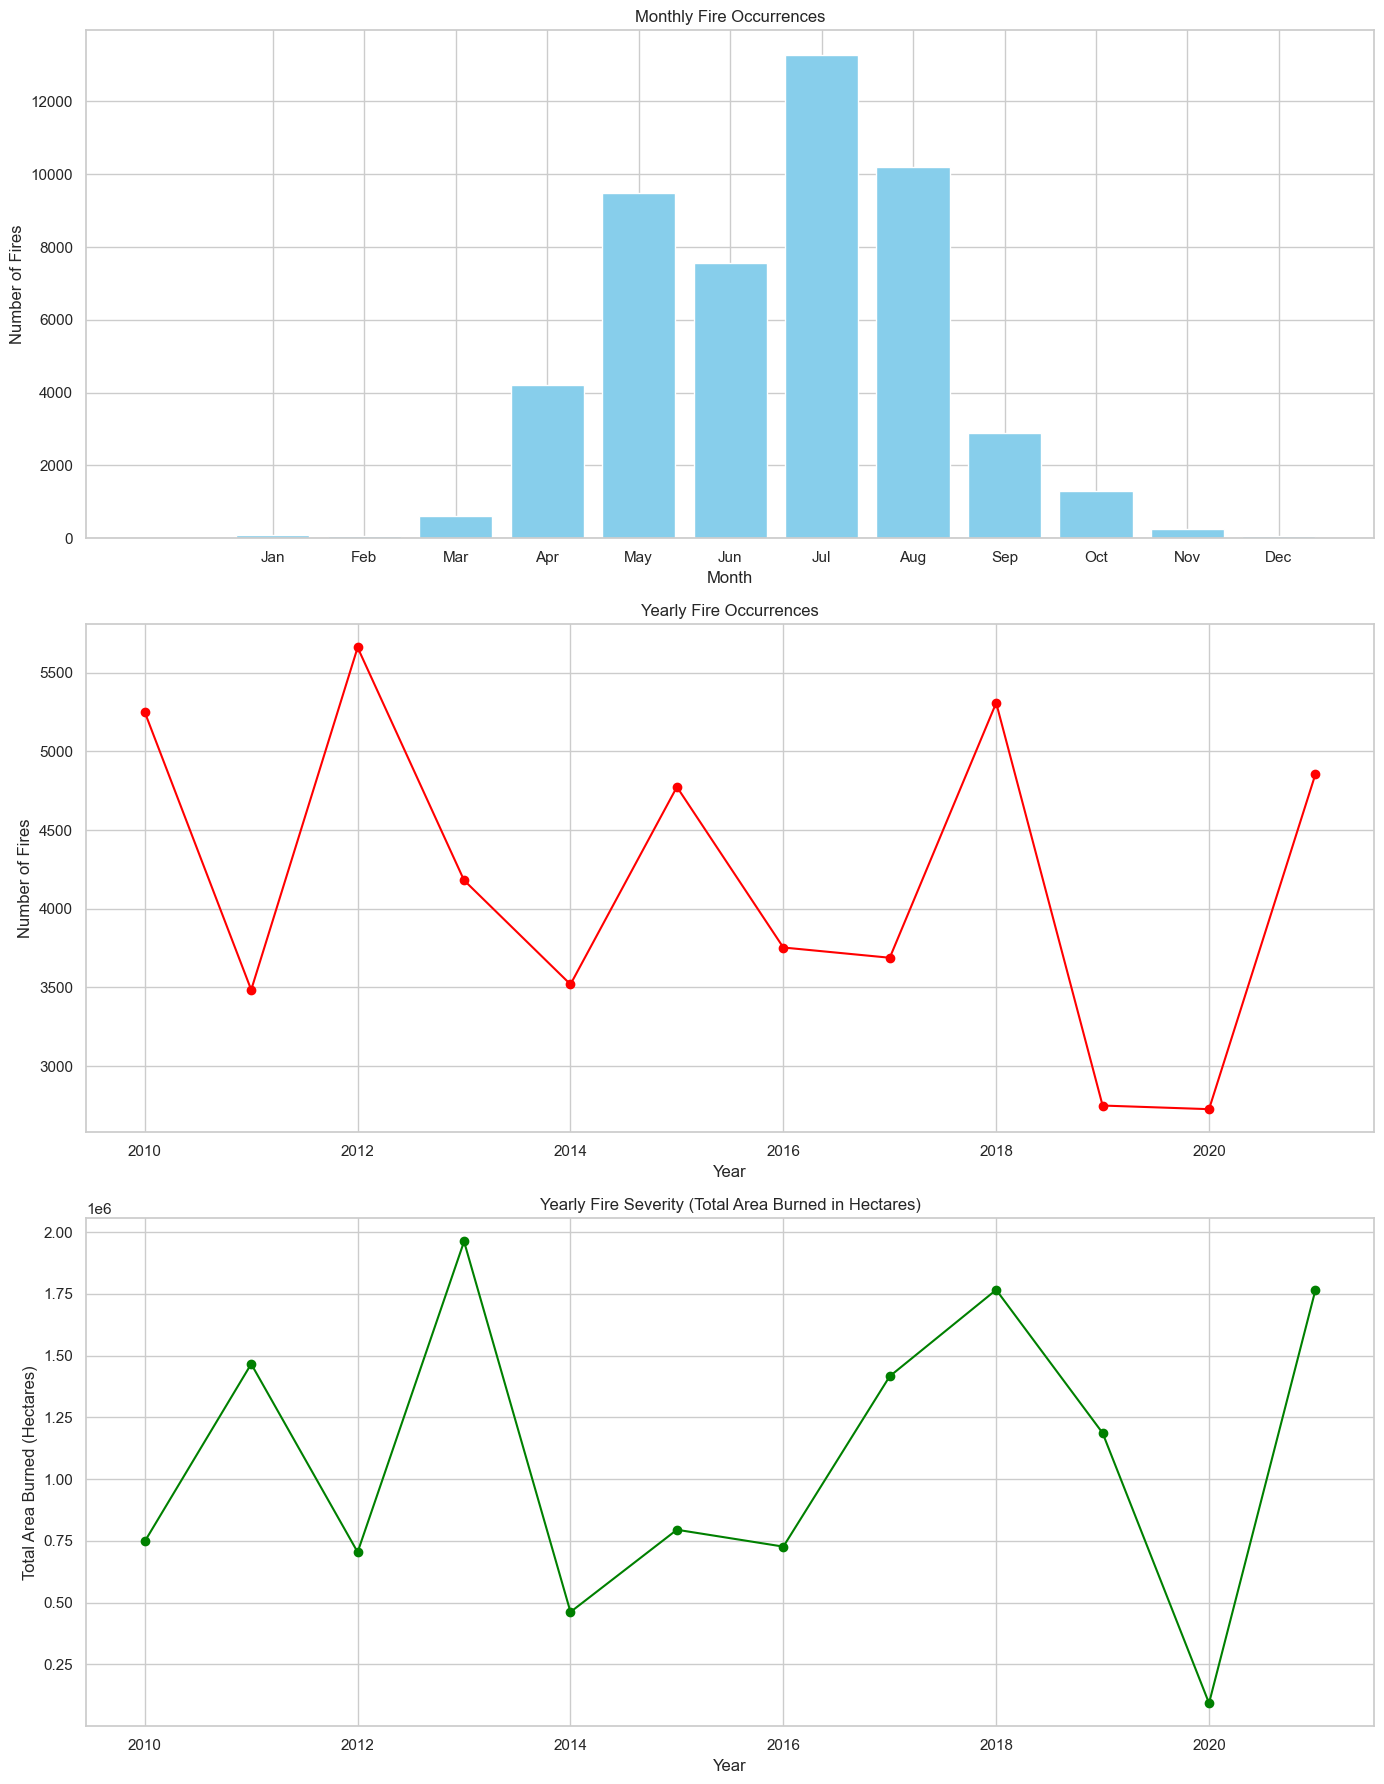

In [30]:
#creating a new column for combined year and month to facilitate analysis
data['Year_Month'] = data['YEAR'].astype(str) + '-' + data['MONTH'].astype(str).str.zfill(2)

#group by month to identify peak fire seasons
monthly_fire_counts = data['MONTH'].value_counts().sort_index()

#the frequency of fires over the years
yearly_fire_counts = data['YEAR'].value_counts().sort_index()

#Fire severity by year 
yearly_fire_severity = data.groupby('YEAR')['SIZE_HA'].sum()


fig, axes = plt.subplots(3, 1, figsize=(14, 18))

#monthly fire counts
axes[0].bar(monthly_fire_counts.index, monthly_fire_counts.values, color='skyblue')
axes[0].set_title('Monthly Fire Occurrences')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Fires')
axes[0].set_xticks(range(1, 13))  # ensure all months are shown
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

#yearly fire counts
axes[1].plot(yearly_fire_counts.index, yearly_fire_counts.values, marker='o', linestyle='-', color='red')
axes[1].set_title('Yearly Fire Occurrences')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Fires')

#fire severity by year
axes[2].plot(yearly_fire_severity.index, yearly_fire_severity.values, marker='o', linestyle='-', color='green')
axes[2].set_title('Yearly Fire Severity (Total Area Burned in Hectares)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Total Area Burned (Hectares)')

plt.tight_layout()
plt.show()

/var/folders/n3/wq3qj7vn3c12xjhrsq0nrmcr0000gn/T/ipykernel_9733/3100065148.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='YEAR', data=data, palette='viridis')


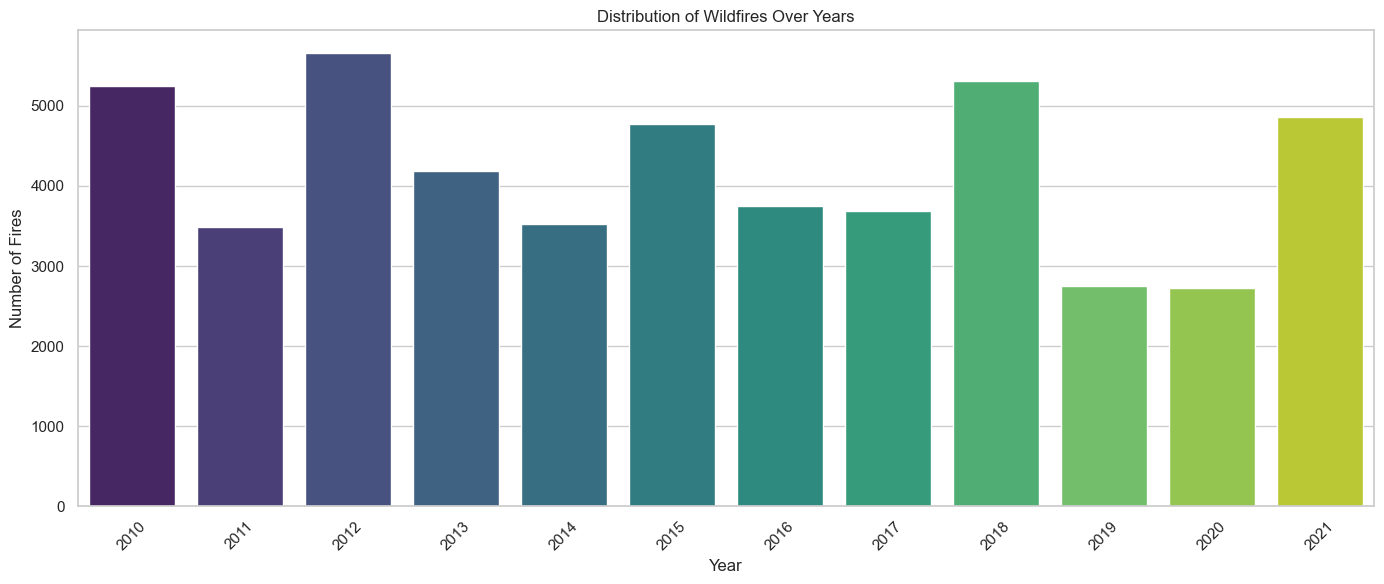

In [31]:
#distribution of fires over the years
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.countplot(x='YEAR', data=data, palette='viridis')
plt.title('Distribution of Wildfires Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Spatial Analysis

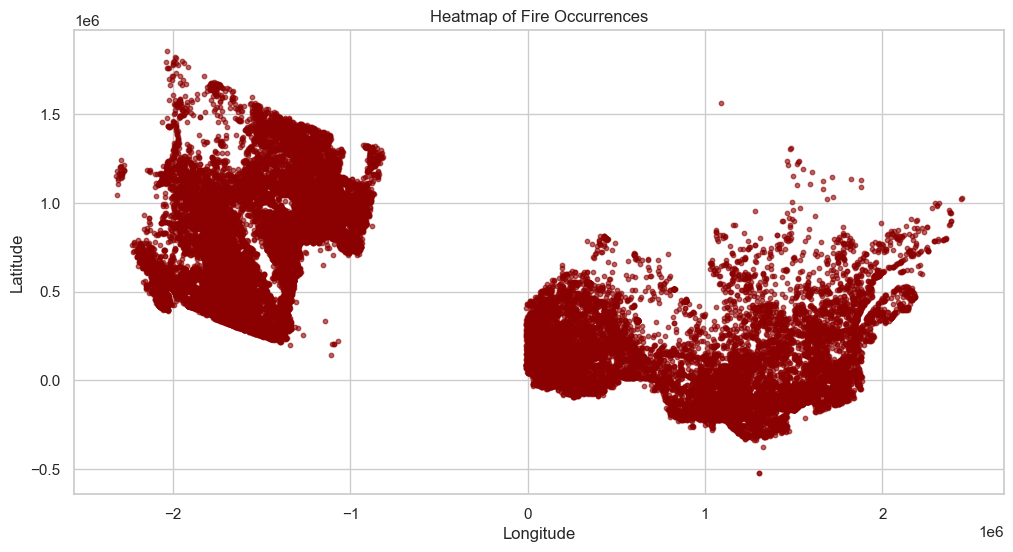

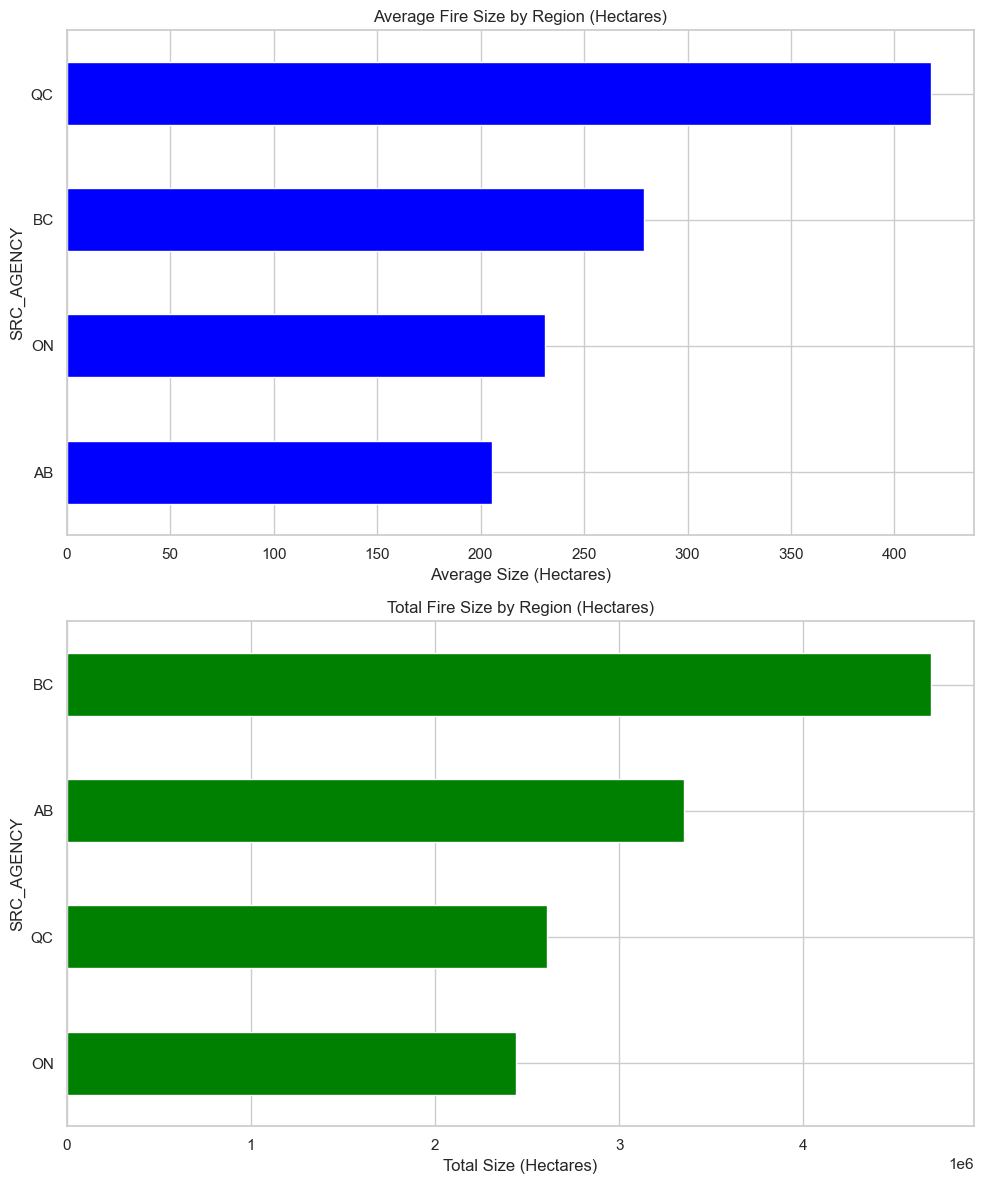

In [32]:
#heat map of fire occ

data['geometry'] = data['geometry'].astype(str).apply(wkt.loads)
# Plotting a simple geographical heatmap of fire occurrences
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
data.plot(ax=ax, markersize=10, color='darkred', alpha=0.6)  
ax.set_title('Heatmap of Fire Occurrences')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.grid(True) 
plt.show()


region_fire_sizes = data.groupby('SRC_AGENCY')['SIZE_HA'].agg(['mean', 'sum'])

# Creating bar charts for average and total fire sizes by region
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
region_fire_sizes['mean'].sort_values().plot(kind='barh', ax=axes[0], color='blue')
axes[0].set_title('Average Fire Size by Region (Hectares)')
axes[0].set_xlabel('Average Size (Hectares)')

region_fire_sizes['sum'].sort_values().plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Total Fire Size by Region (Hectares)')
axes[1].set_xlabel('Total Size (Hectares)')

plt.tight_layout()
plt.show()


Causal Analysis

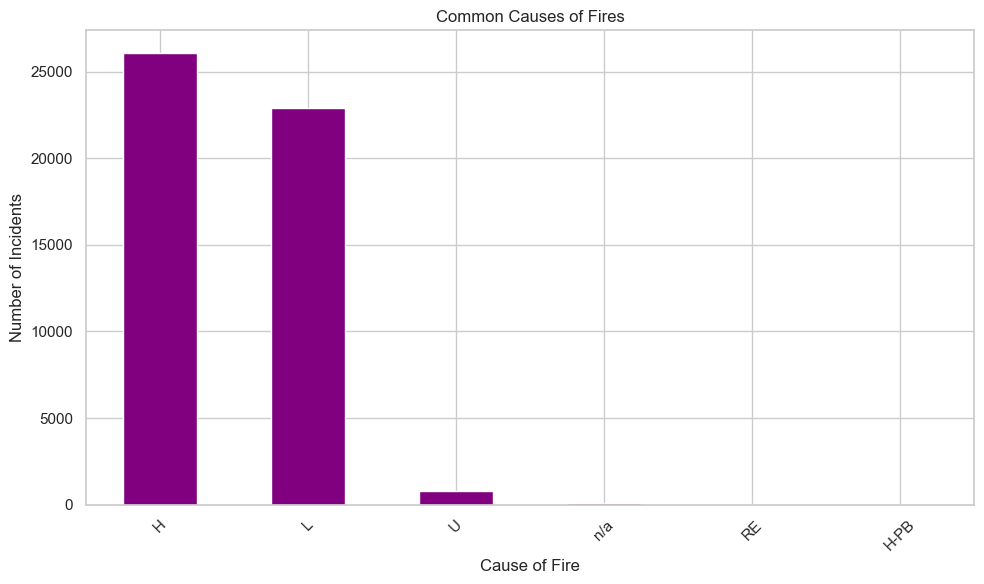

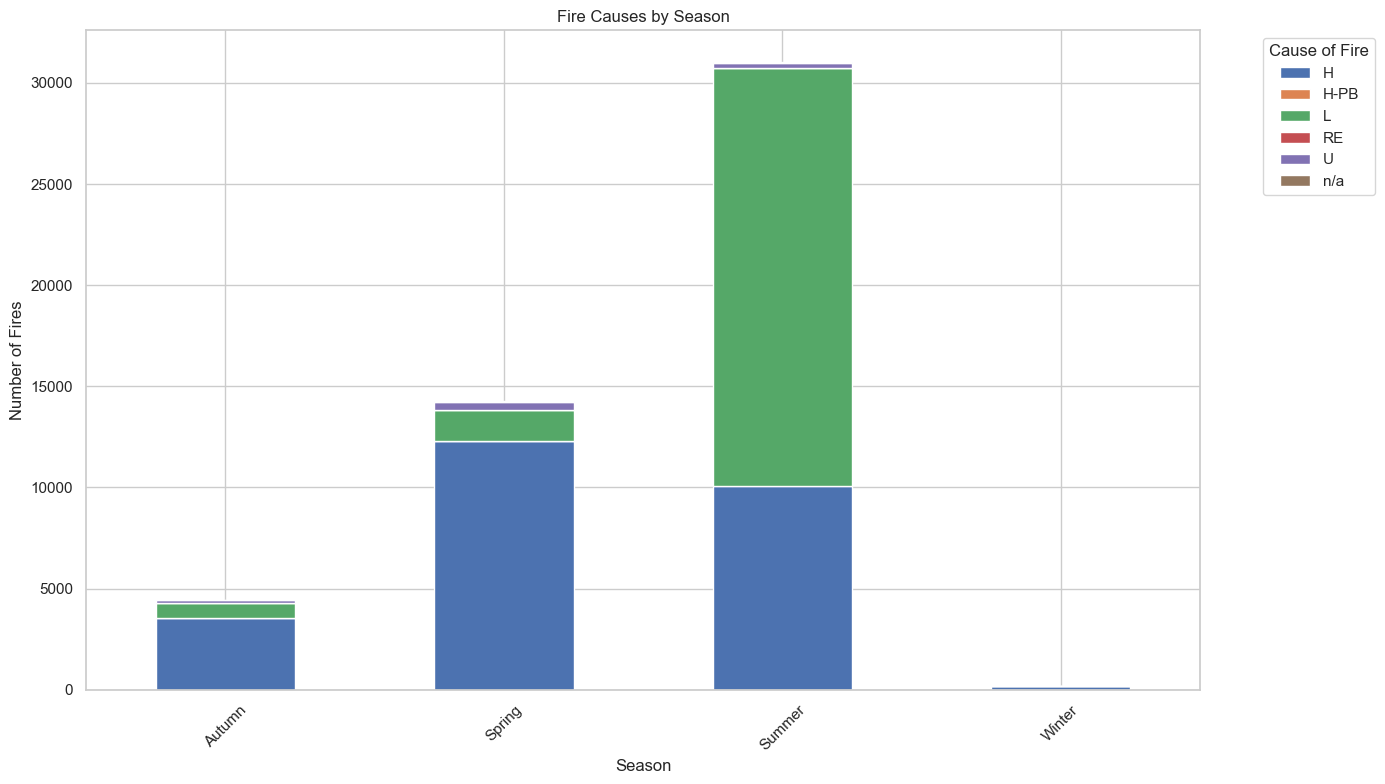

In [33]:
#the common causes of fires
common_causes = data['CAUSE'].value_counts()

#exploring the relationship between fire causes and seasons
#creating a season column based on the month
def month_to_season(month):
    if month in (3, 4, 5):
        return 'Spring'
    elif month in (6, 7, 8):
        return 'Summer'
    elif month in (9, 10, 11):
        return 'Autumn'
    else:
        return 'Winter'

data['Season'] = data['MONTH'].apply(month_to_season)

#grouping data by cause and season to see the distribution
cause_season_distribution = data.groupby(['Season', 'CAUSE']).size().unstack(fill_value=0)

#the common causes of fires
plt.figure(figsize=(10, 6))
common_causes.plot(kind='bar', color='purple')
plt.title('Common Causes of Fires')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#the relationship between fire causes and seasons
cause_season_distribution.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title('Fire Causes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.legend(title='Cause of Fire', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Impact Analysis

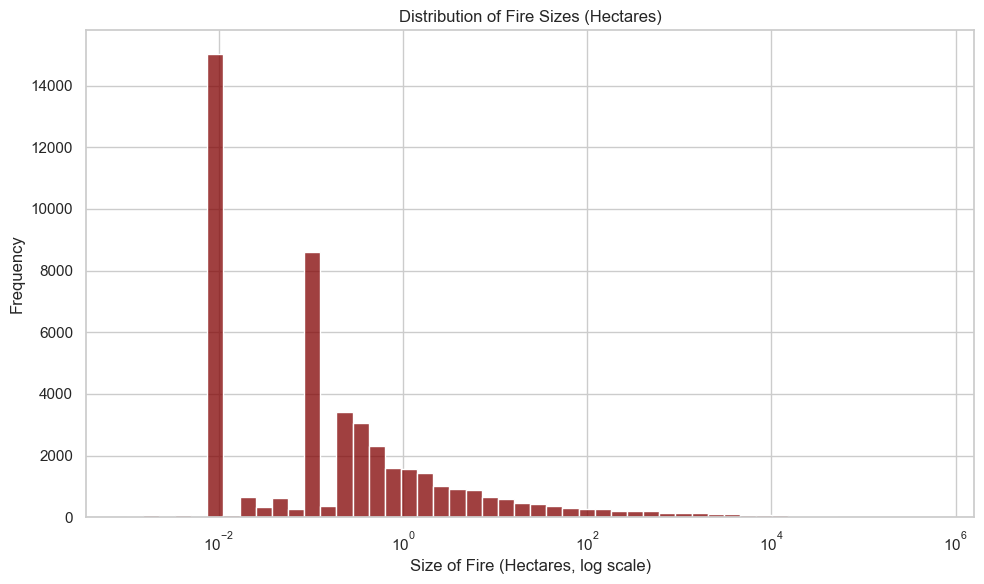

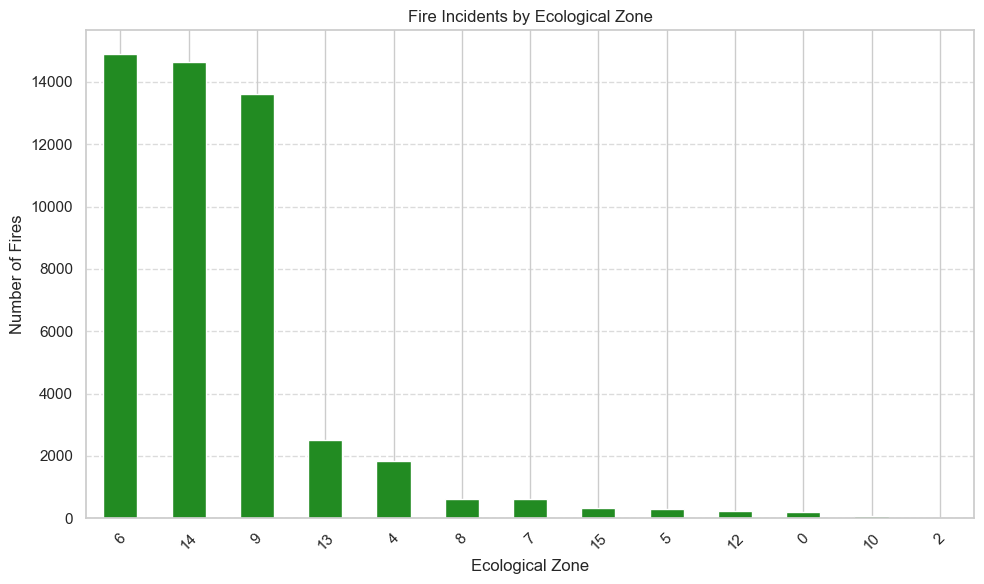

In [34]:
#fire Impact by Size: Analyzing the distribution of fire sizes
plt.figure(figsize=(10, 6))
sns.histplot(data['SIZE_HA'].dropna(), bins=50, log_scale=True, color='maroon')
plt.title('Distribution of Fire Sizes (Hectares)')
plt.xlabel('Size of Fire (Hectares, log scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

ecological_impact = data['ECOZONE'].value_counts()

#the ecological impact
plt.figure(figsize=(10, 6))
ecological_impact.plot(kind='bar', color='forestgreen')
plt.title('Fire Incidents by Ecological Zone')
plt.xlabel('Ecological Zone')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/var/folders/n3/wq3qj7vn3c12xjhrsq0nrmcr0000gn/T/ipykernel_9733/3131295326.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_size_by_zone.values, y=average_size_by_zone.index, palette='magma')


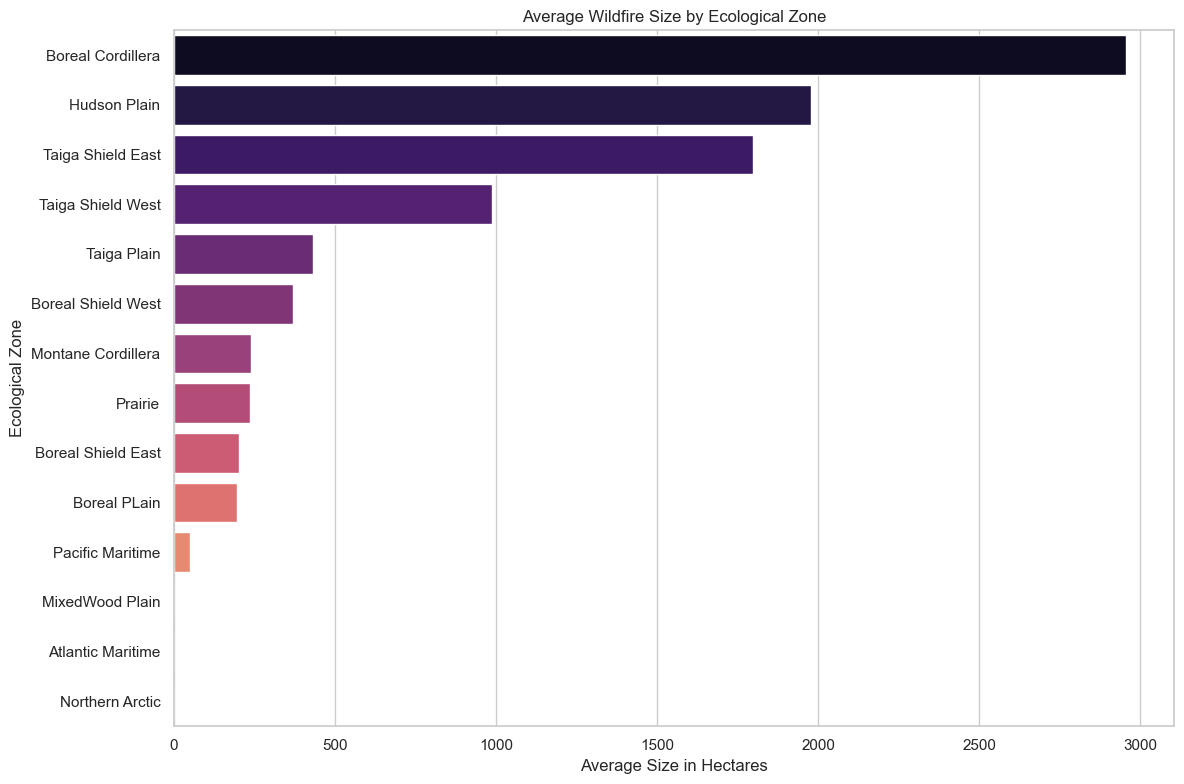

In [35]:
#the average wildfire size by ecological zone
average_size_by_zone = data.groupby('ECOZ_NAME')['SIZE_HA'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=average_size_by_zone.values, y=average_size_by_zone.index, palette='magma')
plt.title('Average Wildfire Size by Ecological Zone')
plt.xlabel('Average Size in Hectares')
plt.ylabel('Ecological Zone')
plt.tight_layout()
plt.show()


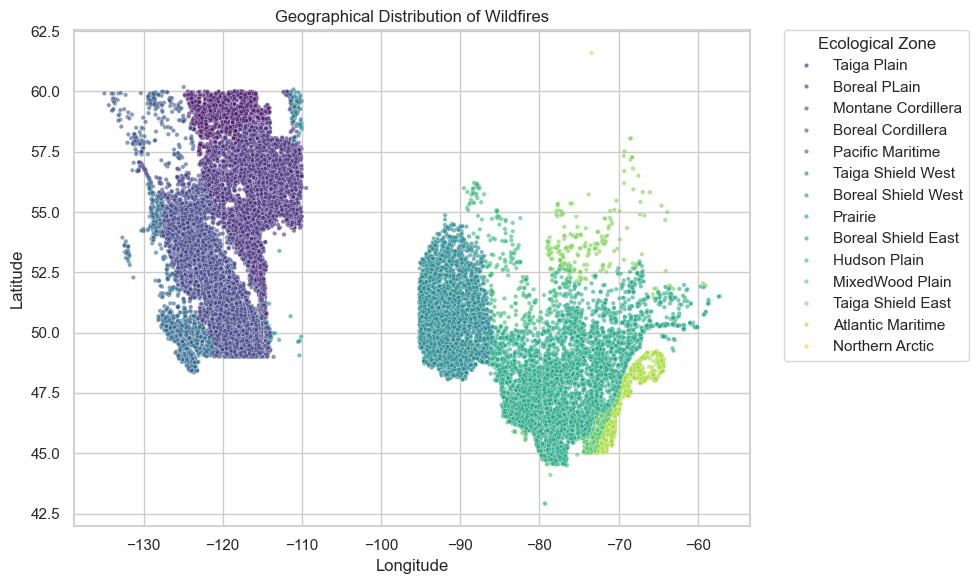

In [36]:
#the geographical distribution of wildfires
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=data, hue='ECOZ_NAME', palette='viridis', s=10, alpha=0.6)
plt.title('Geographical Distribution of Wildfires')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Ecological Zone', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


/var/folders/n3/wq3qj7vn3c12xjhrsq0nrmcr0000gn/T/ipykernel_9733/4230876959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='ECOZ_NAME', x='SIZE_HA', data=data, showfliers=False, palette='autumn')


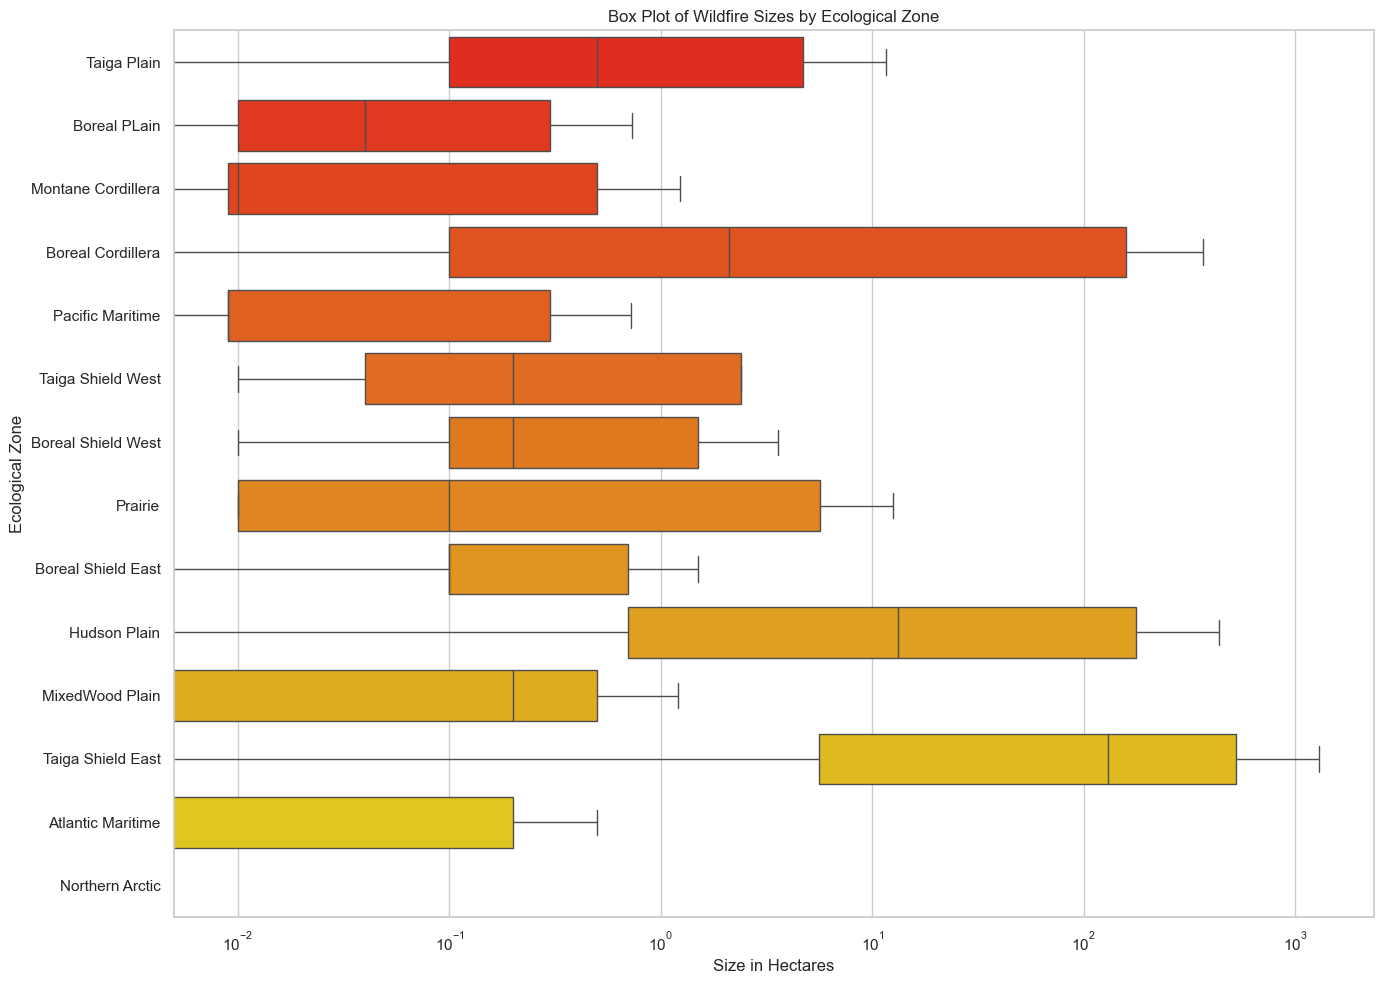

In [37]:
#the spread of fire sizes across different ecological zones
plt.figure(figsize=(14, 10))
sns.boxplot(y='ECOZ_NAME', x='SIZE_HA', data=data, showfliers=False, palette='autumn')
plt.title('Box Plot of Wildfire Sizes by Ecological Zone')
plt.xlabel('Size in Hectares')
plt.ylabel('Ecological Zone')
plt.xscale('log')  
plt.tight_layout()
plt.show()


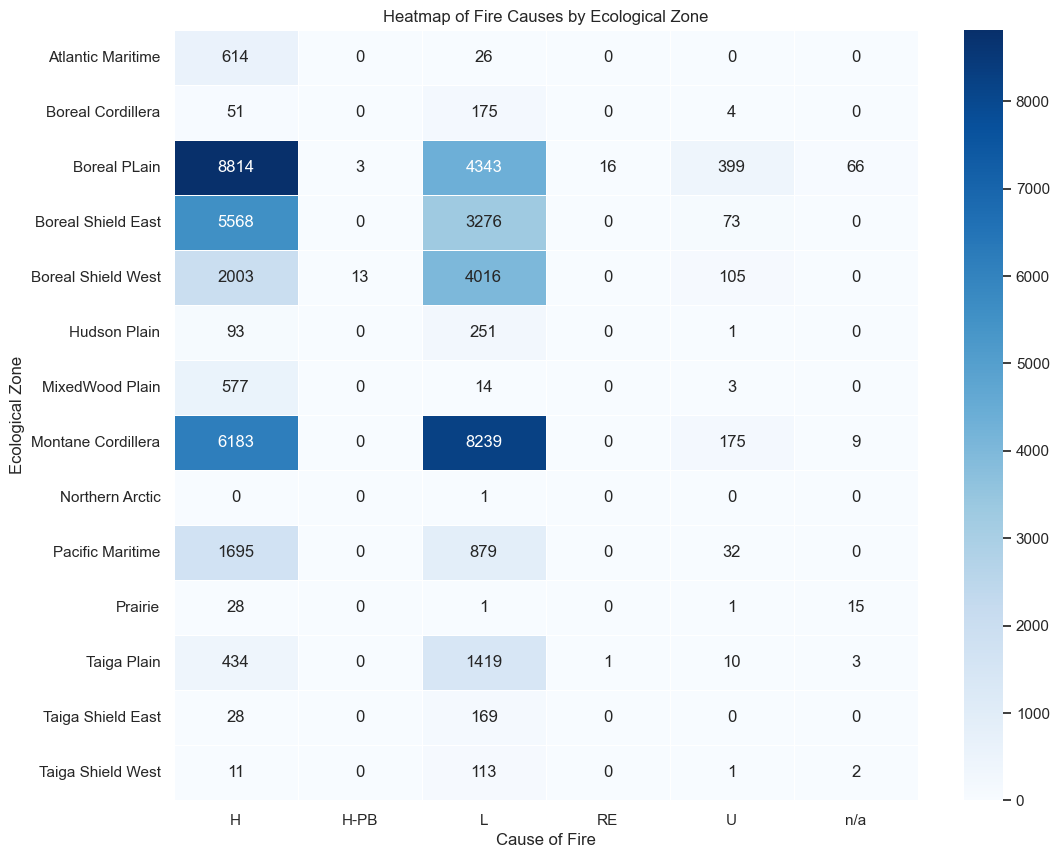

In [38]:
#filtering the data to include only records with a reported cause and ecological zone information
cause_zone_data = data.dropna(subset=['CAUSE'])
cause_zone_crosstab = pd.crosstab(cause_zone_data['ECOZ_NAME'], cause_zone_data['CAUSE'])
plt.figure(figsize=(12, 10))
sns.heatmap(cause_zone_crosstab, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Heatmap of Fire Causes by Ecological Zone')
plt.xlabel('Cause of Fire')
plt.ylabel('Ecological Zone')
plt.show()


Detailed Seasonal and Temporal Impact

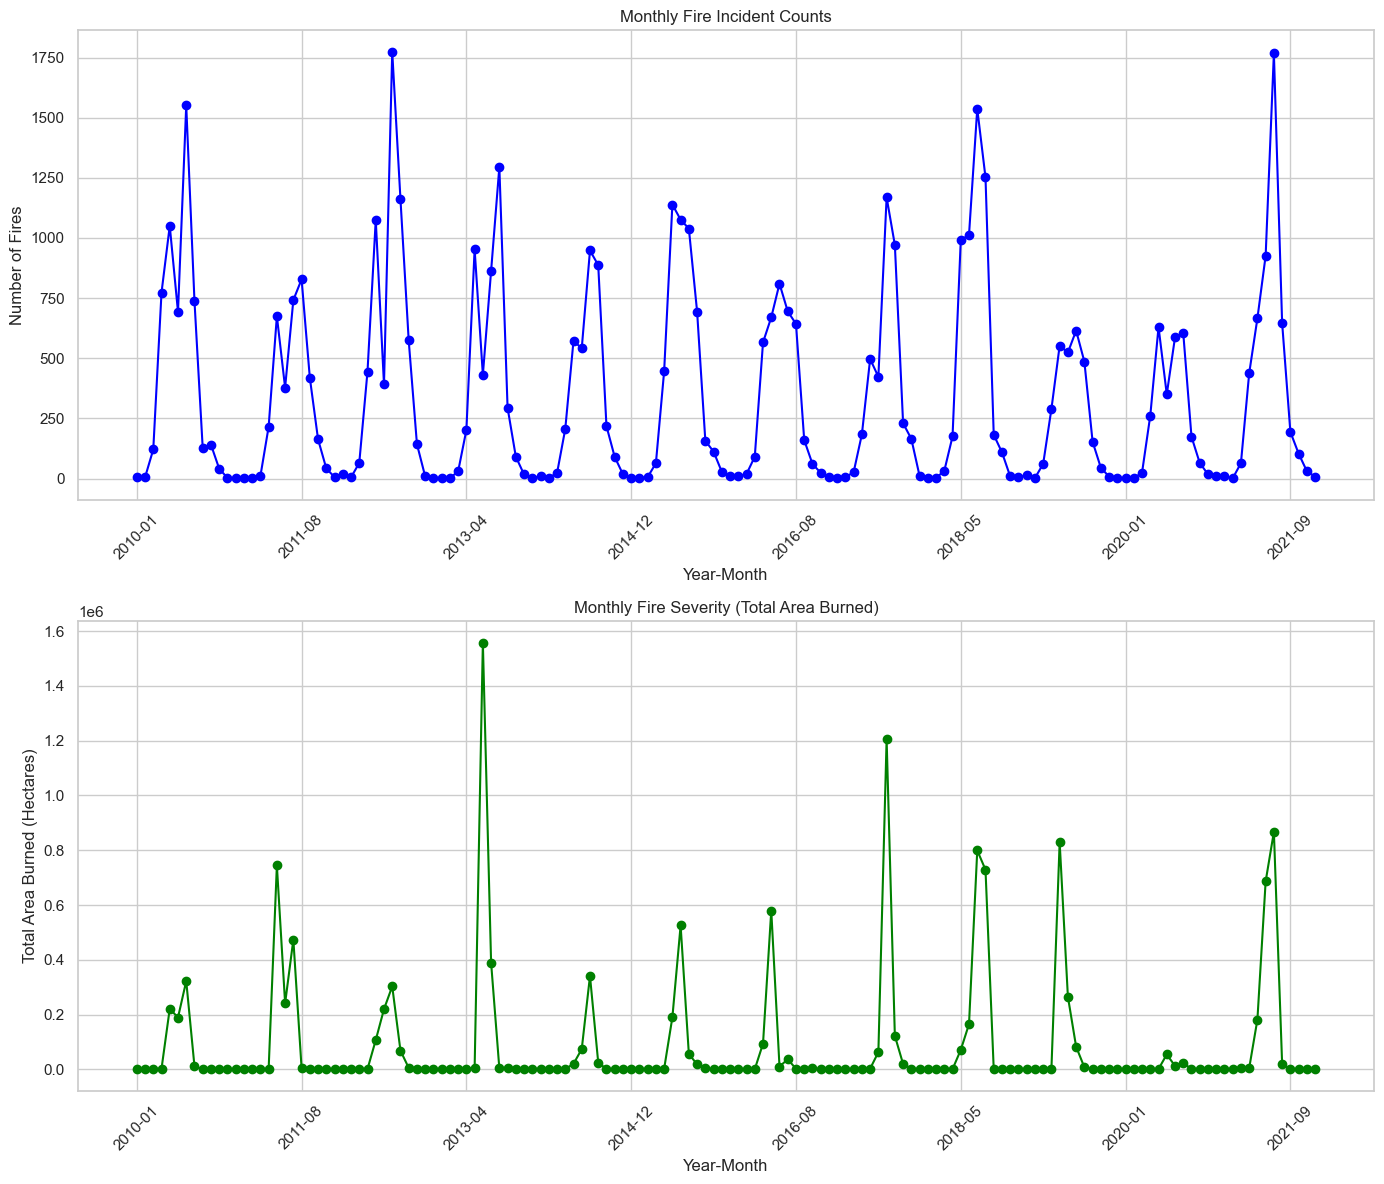

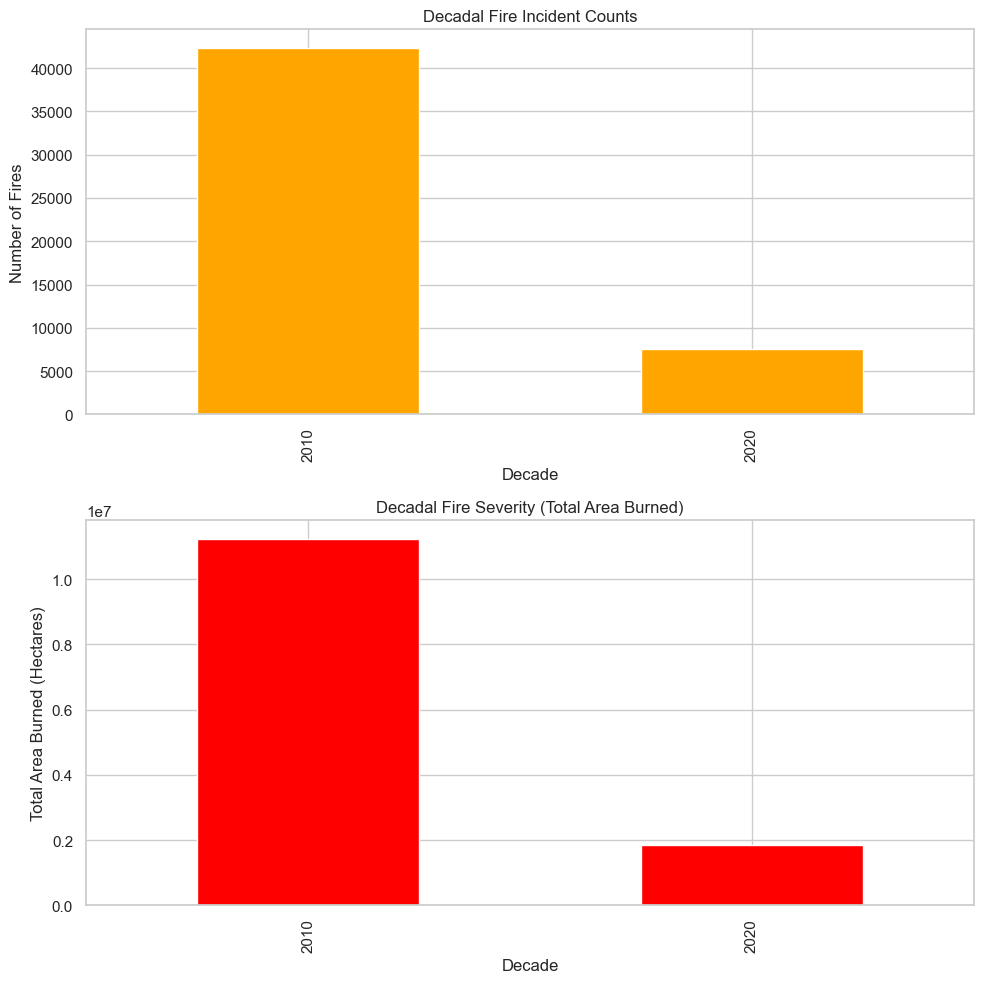

In [39]:
#detailed Month-by-Month Analysis: Analyzing fire incidents and severity per month across all years
monthly_fire_severity = data.groupby('Year_Month')['SIZE_HA'].agg(['count', 'sum']).sort_index()

#long-term Changes in Fire Patterns: Analyzing changes over decades
if 'DECADE' not in data.columns or data['DECADE'].dtype != int:
    data['DECADE'] = (data['YEAR'] // 10) * 10  

decadal_fire_counts = data['DECADE'].value_counts().sort_index()
decadal_fire_severity = data.groupby('DECADE')['SIZE_HA'].sum()

#the detailed month-by-month analysis for number and severity of fires
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

monthly_fire_severity['count'].plot(ax=ax[0], color='blue', marker='o')
ax[0].set_title('Monthly Fire Incident Counts')
ax[0].set_xlabel('Year-Month')
ax[0].set_ylabel('Number of Fires')
ax[0].tick_params(axis='x', rotation=45)

monthly_fire_severity['sum'].plot(ax=ax[1], color='green', marker='o')
ax[1].set_title('Monthly Fire Severity (Total Area Burned)')
ax[1].set_xlabel('Year-Month')
ax[1].set_ylabel('Total Area Burned (Hectares)')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#the long-term decadal changes
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

decadal_fire_counts.plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Decadal Fire Incident Counts')
axes[0].set_xlabel('Decade')
axes[0].set_ylabel('Number of Fires')

decadal_fire_severity.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title('Decadal Fire Severity (Total Area Burned)')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Total Area Burned (Hectares)')

plt.tight_layout()
plt.show()
